In [10]:
## Librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
import numpy as np
from scipy.fft import fft  #  Importa correctamente la FFT
from scipy.signal import correlate
from scipy.fftpack import fft, ifft
import soundfile as sf
import librosa
import librosa.display
from scipy.io.wavfile import write
from scipy.signal import stft, istft
from sklearn.decomposition import FastICA
from colorama import Fore, init

In [6]:
import librosa
import librosa.display
print("Librosa se ha instalado correctamente.")


Librosa se ha instalado correctamente.


In [4]:
# Cargar los archivos de audio
señal_isa, sr_señal_isa = librosa.load("Audio-Isa.mp3", sr=None)  # Señal principal Isa
ruido_isa, sr_ruido_isa = librosa.load("Ruido-Isa.mp3", sr=None)  # Ruido Isa
#sr=None indica que se mantiene la frecuencia de muestreo original del archivo (en lugar de forzar una frecuencia estándar
#señal_isa: Es un array NumPy que contiene los valores de amplitud de la señal en el dominio temporal.
#sr_señal_isa: Es la frecuencia de muestreo (sample rate) del audio en Hz, es decir, cuántas muestras por segundo tiene la señal.

señal_ana, sr_señal_ana = librosa.load("Audio-Ana.mp3", sr=None)  # Señal principal Ana
ruido_ana, sr_ruido_ana = librosa.load("Ruido-Ana.mp3", sr=None)  # Ruido Ana

señal_luna, sr_señal_luna = librosa.load("Audio-Luna.mp3", sr=None)  # Señal principal Luna
ruido_luna, sr_ruido_luna = librosa.load("Ruido-Luna.mp3", sr=None)  # Ruido Luna

In [5]:
#Función para calcular el SNR, retorna ese valor
def calculate_snr(señal, ruido): #la función recibirá argumentos para señal y ruido, que corresponden a la señal y al ruido
    
    if len(señal) != len(ruido): #Si la señal y el ruido tienen longitudes diferentes, se recorta la más larga para que ambas tengan el mismo número de muestras.
        min_length = min(len(señal), len(ruido))
        señal, ruido = señal[:min_length], ruido[:min_length]
    
    pot_señal = np.mean(señal**2)#se calcula la  potencia de la señal
    pot_ruido = np.mean(ruido**2)#potencia del ruido
    
    snr = 10 * np.log10(pot_señal / pot_ruido)#calculo SNR
    return snr #devuelve al llamado de la función el valor del SNR
#Final función 

# Verificar frecuencias de muestreo
if sr_señal_isa != sr_ruido_isa or sr_señal_ana != sr_ruido_ana or sr_señal_luna != sr_ruido_luna: #Todos grabamos a 44.1kHz, entonces no se espera errror
    print("Las frecuencias de muestreo no coinciden. Se debe remuestrear.")
    
else:
    # SNR para Isabela
    snr_isa = calculate_snr(señal_isa, ruido_isa)
    print(f"SNR para audio Isabela: {snr_isa:.2f} dB")

    # SNR para Ana
    snr_ana = calculate_snr(señal_ana, ruido_ana)
    print(f"SNR para audio Ana: {snr_ana:.2f} dB")

    # SNR para Ana
    snr_luna = calculate_snr(señal_luna, ruido_luna)
    print(f"SNR para audio Luna: {snr_luna:.2f} dB")
    
#Se llama a la función calculate_snr(señal_***, ruido_***) para obtener el SNR del audio de *** y se imprime con dos decimales.

SNR para audio Isabela: 15.15 dB
SNR para audio Ana: 22.30 dB
SNR para audio Luna: 14.67 dB


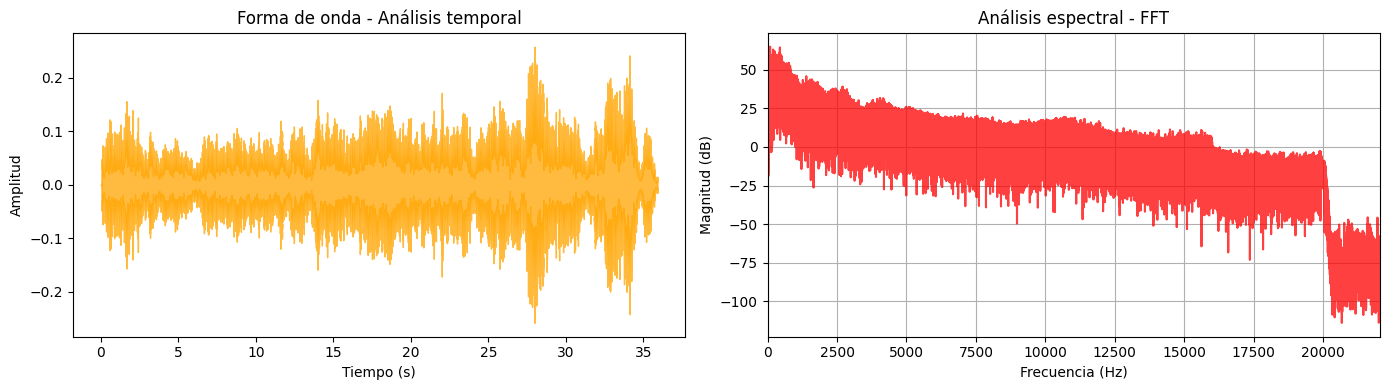

In [28]:
# Cargar la señal de audio
audio = "Audio-Isa.mp3"  # Asegúrate de que el archivo esté en el directorio correcto
señal, sr = librosa.load(audio, sr=None)

# === ANÁLISIS TEMPORAL ===
# Obtener la duración en segundos
duracion = len(señal) / sr

# === ANÁLISIS ESPECTRAL ===
# Aplicar FFT y calcular la magnitud del espectro
N = len(señal)
frec = np.fft.rfftfreq(N, d=1/sr)  # Frecuencias asociadas
fft = np.fft.rfft(señal)  # Aplicar FFT
magnitud = np.abs(fft)  # Obtener magnitud en dB
magnitud_db = 20 * np.log10(magnitud + 1e-6)  # Se suma 1e-6 para evitar log(0)

# === GRAFICACIÓN EN SUBPLOTS ===
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Subplot 1: Forma de onda (Análisis temporal)
librosa.display.waveshow(señal, sr=sr, ax=axs[0], color='orange', alpha=0.75)
axs[0].set_title("Forma de onda - Análisis temporal")
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Amplitud")

# Subplot 2: Espectro de frecuencia (FFT)
axs[1].plot(frec, magnitud_db, color='red', alpha=0.75)
axs[1].set_title("Análisis espectral - FFT")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Magnitud (dB)")
axs[1].set_xlim(0, sr/2)  # Mostrar hasta la frecuencia de Nyquist
axs[1].grid()

# Mostrar los subplots
plt.tight_layout()
plt.show()

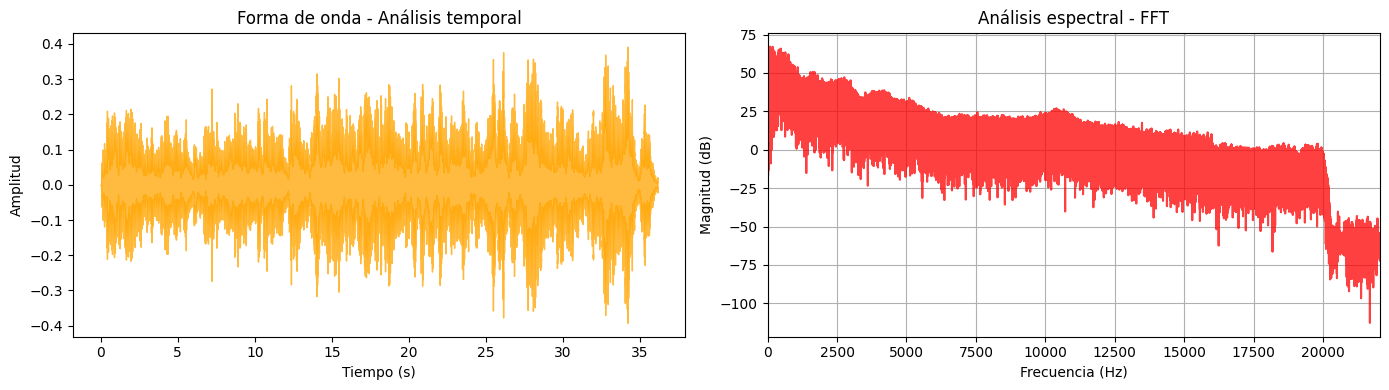

In [29]:
# Cargar la señal de audio
audio = "Audio-Ana.mp3"  # Asegúrate de que el archivo esté en el directorio correcto
señal, sr = librosa.load(audio, sr=None)

# === ANÁLISIS TEMPORAL ===
# Obtener la duración en segundos
duracion = len(señal) / sr

# === ANÁLISIS ESPECTRAL ===
# Aplicar FFT y calcular la magnitud del espectro
N = len(señal)
frec = np.fft.rfftfreq(N, d=1/sr)  # Frecuencias asociadas
fft = np.fft.rfft(señal)  # Aplicar FFT
magnitud = np.abs(fft)  # Obtener magnitud en dB
magnitud_db = 20 * np.log10(magnitud + 1e-6)  # Se suma 1e-6 para evitar log(0)

# === GRAFICACIÓN EN SUBPLOTS ===
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Subplot 1: Forma de onda (Análisis temporal)
librosa.display.waveshow(señal, sr=sr, ax=axs[0], color='orange', alpha=0.75)
axs[0].set_title("Forma de onda - Análisis temporal")
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Amplitud")

# Subplot 2: Espectro de frecuencia (FFT)
axs[1].plot(frec, magnitud_db, color='red', alpha=0.75)
axs[1].set_title("Análisis espectral - FFT")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Magnitud (dB)")
axs[1].set_xlim(0, sr/2)  # Mostrar hasta la frecuencia de Nyquist
axs[1].grid()

# Ajustar el diseño y mostrar los subplots
plt.tight_layout()
plt.show()

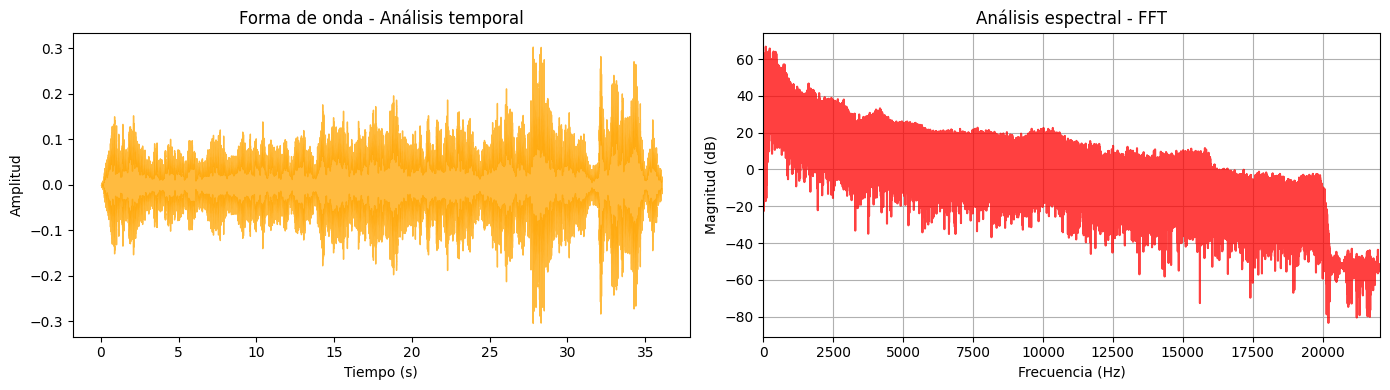

In [30]:
# Cargar la señal de audio
audio = "Audio-Luna.mp3"  # Asegúrate de que el archivo esté en el directorio correcto
señal, sr = librosa.load(audio, sr=None)

# === ANÁLISIS TEMPORAL ===
# Obtener la duración en segundos
duracion = len(señal) / sr

# === ANÁLISIS ESPECTRAL ===
# Aplicar FFT y calcular la magnitud del espectro
N = len(señal)
frec = np.fft.rfftfreq(N, d=1/sr)  # Frecuencias asociadas
fft = np.fft.rfft(señal)  # Aplicar FFT
magnitud = np.abs(fft)  # Obtener magnitud en dB
magnitud_db = 20 * np.log10(magnitud + 1e-6)  # Se suma 1e-6 para evitar log(0)

# === GRAFICACIÓN EN SUBPLOTS ===
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Subplot 1: Forma de onda (Análisis temporal)
librosa.display.waveshow(señal, sr=sr, ax=axs[0], color='orange', alpha=0.75)
axs[0].set_title("Forma de onda - Análisis temporal")
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Amplitud")

# Subplot 2: Espectro de frecuencia (FFT)
axs[1].plot(frec, magnitud_db, color='red', alpha=0.75)
axs[1].set_title("Análisis espectral - FFT")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Magnitud (dB)")
axs[1].set_xlim(0, sr/2)  # Mostrar hasta la frecuencia de Nyquist
axs[1].grid()

# Ajustar el diseño y mostrar los subplots
plt.tight_layout()
plt.show()

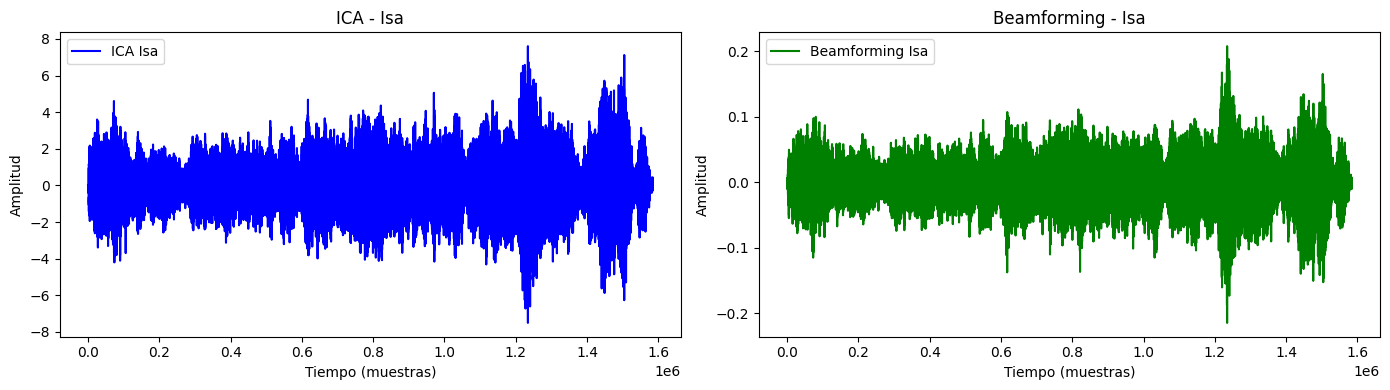

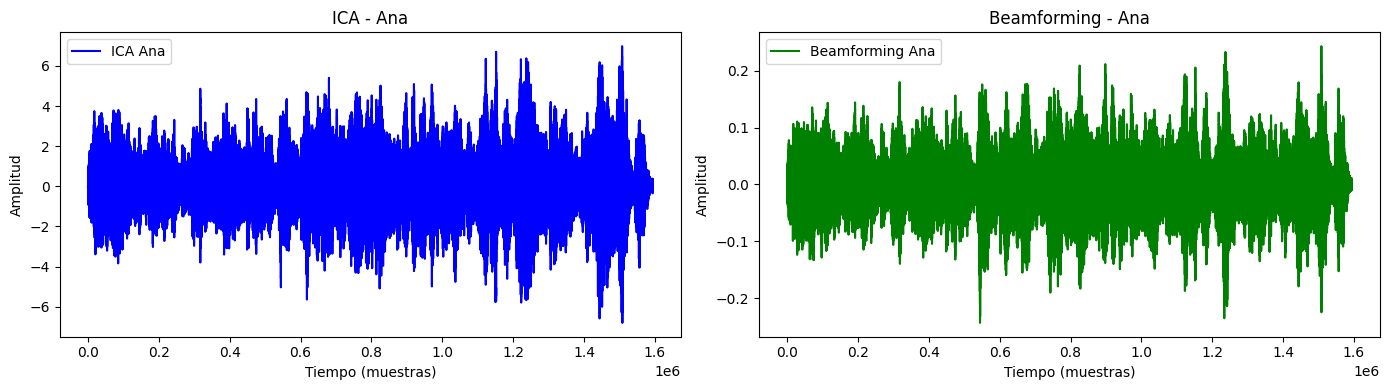

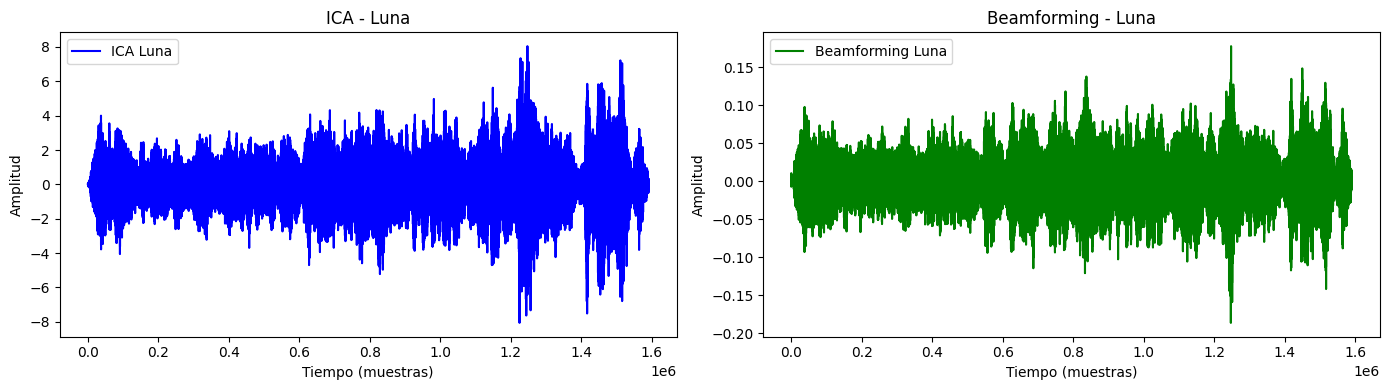

In [33]:
# Asegurar que las frecuencias de muestreo coincidan
if sr_señal_isa != sr_ruido_isa or sr_señal_ana != sr_ruido_ana or sr_señal_luna != sr_ruido_luna:
    raise ValueError("Las frecuencias de muestreo no coinciden")

# Distancias entre micrófonos
distancia = {"Isa": [0, 3.46, 3.50], "Ana": [1.72, 0, 3.50], "Luna": [3.46, 1.72, 0]}  # en metros
v_sonido = 343  # m/s

# Procesar cada señal por separado
for name, señal in zip(["Isa", "Ana", "Luna"], [señal_isa, señal_ana, señal_luna]):
    # Beamforming con alineación por retardo
    delays = np.array(distancia[name]) / v_sonido  # Convertir distancia a tiempo de retardo
    t_muestras = [int(sr_señal_isa * d) for d in delays]  # Convertir tiempo a muestras
    
    # Aplicar beamforming con Delay-and-Sum
    s_alineada = np.zeros_like(señal)
    for shift in t_muestras:
        s_alineada += np.roll(señal, shift) / len(t_muestras)  # Promedio de señales alineadas
    
    write(f'beamformed_{name}.wav', sr_señal_isa, (s_alineada * 32767).astype(np.int16))
    
    # ICA en la señal individual
    ica = FastICA(n_components=1)
    s_separada = ica.fit_transform(señal.reshape(-1, 1)).flatten()
    write(f'ica_{name}.wav', sr_señal_isa, (s_separada * 32767).astype(np.int16))

    # Calcular SNR
    snr_beamforming = calculate_snr(s_alineada, señal)
    snr_ica = calculate_snr(s_separada, señal)
    #print(f"SNR para {name} - Beamforming: {snr_beamforming:.2f} dB")
    #print(f"SNR para {name} - ICA: {snr_ica:.2f} dB")
    
    # Graficar resultados en subplots (ICA a la izquierda, Beamforming a la derecha)
    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    # Subplot 1: ICA
    axs[0].plot(s_separada, label=f'ICA {name}', color='blue')
    axs[0].set_title(f"ICA - {name}")
    axs[0].set_xlabel("Tiempo (muestras)")
    axs[0].set_ylabel("Amplitud")
    axs[0].legend()

    # Subplot 2: Beamforming
    axs[1].plot(s_alineada, label=f'Beamforming {name}', color='green')
    axs[1].set_title(f"Beamforming - {name}")
    axs[1].set_xlabel("Tiempo (muestras)")
    axs[1].set_ylabel("Amplitud")
    axs[1].legend()

    # Ajustar la disposición y mostrar
    plt.tight_layout()
    plt.show()